## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.2363  | train_mse: 1.54961 | train_mae: 0.92127 |  0:00:00s


epoch 1  | loss: 0.97303 | train_mse: 0.97652 | train_mae: 0.71244 |  0:00:01s


epoch 2  | loss: 0.64673 | train_mse: 0.65732 | train_mae: 0.58091 |  0:00:01s


epoch 3  | loss: 0.52032 | train_mse: 0.42474 | train_mae: 0.4586  |  0:00:01s


epoch 4  | loss: 0.48964 | train_mse: 0.45352 | train_mae: 0.46275 |  0:00:02s


epoch 5  | loss: 0.38185 | train_mse: 0.36653 | train_mae: 0.4083  |  0:00:02s


epoch 6  | loss: 0.43528 | train_mse: 0.36582 | train_mae: 0.40984 |  0:00:02s


epoch 7  | loss: 0.39618 | train_mse: 0.41351 | train_mae: 0.40411 |  0:00:03s


epoch 8  | loss: 0.32893 | train_mse: 0.25301 | train_mae: 0.32558 |  0:00:03s


epoch 9  | loss: 0.28216 | train_mse: 0.24359 | train_mae: 0.32823 |  0:00:03s


epoch 10 | loss: 0.25708 | train_mse: 0.25808 | train_mae: 0.32194 |  0:00:04s


epoch 11 | loss: 0.35222 | train_mse: 0.24549 | train_mae: 0.3241  |  0:00:04s


epoch 12 | loss: 0.36316 | train_mse: 0.34087 | train_mae: 0.38552 |  0:00:05s


epoch 13 | loss: 0.3307  | train_mse: 0.23265 | train_mae: 0.3137  |  0:00:05s


epoch 14 | loss: 0.31895 | train_mse: 0.25042 | train_mae: 0.31591 |  0:00:05s


epoch 15 | loss: 0.30561 | train_mse: 0.22513 | train_mae: 0.31171 |  0:00:06s


epoch 16 | loss: 0.32388 | train_mse: 0.21426 | train_mae: 0.2937  |  0:00:06s


epoch 17 | loss: 0.23501 | train_mse: 0.1875  | train_mae: 0.28557 |  0:00:06s


epoch 18 | loss: 0.2252  | train_mse: 0.21696 | train_mae: 0.31427 |  0:00:07s


epoch 19 | loss: 0.3094  | train_mse: 0.22837 | train_mae: 0.32378 |  0:00:07s


epoch 20 | loss: 0.29418 | train_mse: 0.24669 | train_mae: 0.33504 |  0:00:08s


epoch 21 | loss: 0.31687 | train_mse: 0.25782 | train_mae: 0.32825 |  0:00:08s


epoch 22 | loss: 0.32667 | train_mse: 0.23277 | train_mae: 0.32264 |  0:00:09s


epoch 23 | loss: 0.30053 | train_mse: 0.22669 | train_mae: 0.3235  |  0:00:09s


epoch 24 | loss: 0.2691  | train_mse: 0.23132 | train_mae: 0.327   |  0:00:09s


epoch 25 | loss: 0.26089 | train_mse: 0.22832 | train_mae: 0.31001 |  0:00:10s


epoch 26 | loss: 0.25313 | train_mse: 0.20722 | train_mae: 0.29548 |  0:00:10s


epoch 27 | loss: 0.24935 | train_mse: 0.19176 | train_mae: 0.29074 |  0:00:10s


epoch 28 | loss: 0.26735 | train_mse: 0.17305 | train_mae: 0.28292 |  0:00:11s


epoch 29 | loss: 0.27612 | train_mse: 0.19578 | train_mae: 0.30037 |  0:00:11s


epoch 30 | loss: 0.25787 | train_mse: 0.19793 | train_mae: 0.29628 |  0:00:11s


epoch 31 | loss: 0.24797 | train_mse: 0.20429 | train_mae: 0.30813 |  0:00:12s


epoch 32 | loss: 0.27752 | train_mse: 0.18354 | train_mae: 0.28894 |  0:00:12s


epoch 33 | loss: 0.30075 | train_mse: 0.20882 | train_mae: 0.30262 |  0:00:12s


epoch 34 | loss: 0.26199 | train_mse: 0.19223 | train_mae: 0.28796 |  0:00:13s


epoch 35 | loss: 0.21329 | train_mse: 0.17854 | train_mae: 0.27505 |  0:00:13s


epoch 36 | loss: 0.26721 | train_mse: 0.19548 | train_mae: 0.28728 |  0:00:13s


epoch 37 | loss: 0.23688 | train_mse: 0.19347 | train_mae: 0.28361 |  0:00:14s


epoch 38 | loss: 0.2313  | train_mse: 0.18685 | train_mae: 0.27874 |  0:00:14s


epoch 39 | loss: 0.22871 | train_mse: 0.1908  | train_mae: 0.28251 |  0:00:15s


epoch 40 | loss: 0.23271 | train_mse: 0.19215 | train_mae: 0.29642 |  0:00:15s


epoch 41 | loss: 0.22396 | train_mse: 0.19881 | train_mae: 0.28357 |  0:00:15s


epoch 42 | loss: 0.23351 | train_mse: 0.19456 | train_mae: 0.28255 |  0:00:16s


epoch 43 | loss: 0.24977 | train_mse: 0.17404 | train_mae: 0.26334 |  0:00:16s


epoch 44 | loss: 0.21144 | train_mse: 0.18573 | train_mae: 0.27075 |  0:00:16s


epoch 45 | loss: 0.2207  | train_mse: 0.17157 | train_mae: 0.26646 |  0:00:17s


epoch 46 | loss: 0.22841 | train_mse: 0.20114 | train_mae: 0.29445 |  0:00:17s


epoch 47 | loss: 0.20955 | train_mse: 0.1631  | train_mae: 0.26586 |  0:00:17s


epoch 48 | loss: 0.1882  | train_mse: 0.17062 | train_mae: 0.2771  |  0:00:18s


epoch 49 | loss: 0.21307 | train_mse: 0.15458 | train_mae: 0.25709 |  0:00:18s


epoch 50 | loss: 0.22061 | train_mse: 0.14659 | train_mae: 0.24573 |  0:00:19s


epoch 51 | loss: 0.21528 | train_mse: 0.16043 | train_mae: 0.25808 |  0:00:19s


epoch 52 | loss: 0.24562 | train_mse: 0.17062 | train_mae: 0.26848 |  0:00:20s


epoch 53 | loss: 0.20737 | train_mse: 0.14459 | train_mae: 0.26092 |  0:00:20s


epoch 54 | loss: 0.22326 | train_mse: 0.15779 | train_mae: 0.25168 |  0:00:20s


epoch 55 | loss: 0.21799 | train_mse: 0.11829 | train_mae: 0.23847 |  0:00:21s


epoch 56 | loss: 0.19764 | train_mse: 0.17249 | train_mae: 0.27205 |  0:00:21s


epoch 57 | loss: 0.2548  | train_mse: 0.16204 | train_mae: 0.26213 |  0:00:21s


epoch 58 | loss: 0.22265 | train_mse: 0.17435 | train_mae: 0.2842  |  0:00:22s


epoch 59 | loss: 0.22939 | train_mse: 0.25313 | train_mae: 0.31498 |  0:00:22s


epoch 60 | loss: 0.24093 | train_mse: 0.19736 | train_mae: 0.30561 |  0:00:22s


epoch 61 | loss: 0.25828 | train_mse: 0.17751 | train_mae: 0.29749 |  0:00:23s


epoch 62 | loss: 0.27526 | train_mse: 0.19847 | train_mae: 0.29601 |  0:00:23s


epoch 63 | loss: 0.23016 | train_mse: 0.1853  | train_mae: 0.29031 |  0:00:24s


epoch 64 | loss: 0.1795  | train_mse: 0.17609 | train_mae: 0.27611 |  0:00:24s


epoch 65 | loss: 0.21927 | train_mse: 0.17205 | train_mae: 0.26214 |  0:00:24s


epoch 66 | loss: 0.20855 | train_mse: 0.18111 | train_mae: 0.2716  |  0:00:25s


epoch 67 | loss: 0.2262  | train_mse: 0.19502 | train_mae: 0.27862 |  0:00:25s


epoch 68 | loss: 0.17832 | train_mse: 0.21183 | train_mae: 0.27895 |  0:00:25s


epoch 69 | loss: 0.18338 | train_mse: 0.15368 | train_mae: 0.25844 |  0:00:26s


epoch 70 | loss: 0.21832 | train_mse: 0.13135 | train_mae: 0.2488  |  0:00:26s


epoch 71 | loss: 0.19843 | train_mse: 0.14121 | train_mae: 0.25703 |  0:00:27s


epoch 72 | loss: 0.14821 | train_mse: 0.12724 | train_mae: 0.24173 |  0:00:27s


epoch 73 | loss: 0.22362 | train_mse: 0.13968 | train_mae: 0.25631 |  0:00:27s


epoch 74 | loss: 0.17171 | train_mse: 0.13094 | train_mae: 0.25962 |  0:00:28s


epoch 75 | loss: 0.16106 | train_mse: 0.12201 | train_mae: 0.24346 |  0:00:28s


epoch 76 | loss: 0.1834  | train_mse: 0.12937 | train_mae: 0.23951 |  0:00:28s


epoch 77 | loss: 0.17932 | train_mse: 0.12135 | train_mae: 0.24057 |  0:00:29s


epoch 78 | loss: 0.21226 | train_mse: 0.12443 | train_mae: 0.23677 |  0:00:29s


epoch 79 | loss: 0.18634 | train_mse: 0.125   | train_mae: 0.24209 |  0:00:29s


epoch 80 | loss: 0.18826 | train_mse: 0.12654 | train_mae: 0.25481 |  0:00:30s


epoch 81 | loss: 0.15672 | train_mse: 0.15558 | train_mae: 0.26592 |  0:00:30s


epoch 82 | loss: 0.17665 | train_mse: 0.14564 | train_mae: 0.24218 |  0:00:31s


epoch 83 | loss: 0.20067 | train_mse: 0.15227 | train_mae: 0.26175 |  0:00:31s


epoch 84 | loss: 0.23135 | train_mse: 0.15209 | train_mae: 0.26509 |  0:00:31s


epoch 85 | loss: 0.18896 | train_mse: 0.15535 | train_mae: 0.26309 |  0:00:32s


epoch 86 | loss: 0.23052 | train_mse: 0.18415 | train_mae: 0.26485 |  0:00:32s


epoch 87 | loss: 0.17377 | train_mse: 0.22297 | train_mae: 0.27755 |  0:00:32s


epoch 88 | loss: 0.18401 | train_mse: 0.22301 | train_mae: 0.27041 |  0:00:33s


epoch 89 | loss: 0.18481 | train_mse: 0.20152 | train_mae: 0.27068 |  0:00:33s


epoch 90 | loss: 0.19109 | train_mse: 0.13944 | train_mae: 0.25061 |  0:00:34s


epoch 91 | loss: 0.18103 | train_mse: 0.13156 | train_mae: 0.23746 |  0:00:34s


epoch 92 | loss: 0.20283 | train_mse: 0.12768 | train_mae: 0.23952 |  0:00:34s


epoch 93 | loss: 0.21928 | train_mse: 0.12784 | train_mae: 0.24285 |  0:00:35s


epoch 94 | loss: 0.18942 | train_mse: 0.14057 | train_mae: 0.24476 |  0:00:35s


epoch 95 | loss: 0.2212  | train_mse: 0.13288 | train_mae: 0.24126 |  0:00:35s


epoch 96 | loss: 0.18451 | train_mse: 0.12574 | train_mae: 0.24507 |  0:00:36s


epoch 97 | loss: 0.1255  | train_mse: 0.11412 | train_mae: 0.22555 |  0:00:36s


epoch 98 | loss: 0.14407 | train_mse: 0.13407 | train_mae: 0.25451 |  0:00:37s


epoch 99 | loss: 0.18121 | train_mse: 0.11742 | train_mae: 0.23277 |  0:00:37s


epoch 100| loss: 0.18434 | train_mse: 0.14929 | train_mae: 0.25539 |  0:00:37s


epoch 101| loss: 0.18951 | train_mse: 0.13219 | train_mae: 0.23906 |  0:00:38s


epoch 102| loss: 0.20425 | train_mse: 0.13139 | train_mae: 0.24177 |  0:00:38s


epoch 103| loss: 0.25263 | train_mse: 0.12312 | train_mae: 0.24042 |  0:00:38s


epoch 104| loss: 0.16617 | train_mse: 0.10985 | train_mae: 0.22468 |  0:00:39s


epoch 105| loss: 0.18314 | train_mse: 0.11496 | train_mae: 0.22888 |  0:00:39s


epoch 106| loss: 0.15056 | train_mse: 0.11518 | train_mae: 0.22653 |  0:00:40s


epoch 107| loss: 0.1699  | train_mse: 0.12215 | train_mae: 0.23802 |  0:00:40s


epoch 108| loss: 0.17134 | train_mse: 0.11959 | train_mae: 0.23625 |  0:00:40s


epoch 109| loss: 0.18446 | train_mse: 0.09922 | train_mae: 0.21529 |  0:00:41s


epoch 110| loss: 0.17818 | train_mse: 0.10647 | train_mae: 0.21824 |  0:00:41s


epoch 111| loss: 0.19396 | train_mse: 0.13644 | train_mae: 0.22617 |  0:00:41s


epoch 112| loss: 0.16865 | train_mse: 0.15126 | train_mae: 0.24275 |  0:00:42s


epoch 113| loss: 0.16816 | train_mse: 0.14469 | train_mae: 0.2506  |  0:00:42s


epoch 114| loss: 0.15222 | train_mse: 0.1015  | train_mae: 0.22055 |  0:00:43s


epoch 115| loss: 0.16338 | train_mse: 0.11695 | train_mae: 0.23353 |  0:00:43s


epoch 116| loss: 0.15376 | train_mse: 0.08867 | train_mae: 0.2065  |  0:00:43s


epoch 117| loss: 0.1384  | train_mse: 0.09005 | train_mae: 0.20651 |  0:00:44s


epoch 118| loss: 0.21668 | train_mse: 0.11602 | train_mae: 0.22659 |  0:00:44s


epoch 119| loss: 0.16694 | train_mse: 0.10355 | train_mae: 0.22413 |  0:00:45s


epoch 120| loss: 0.16989 | train_mse: 0.11768 | train_mae: 0.2474  |  0:00:45s


epoch 121| loss: 0.15327 | train_mse: 0.10992 | train_mae: 0.23494 |  0:00:45s


epoch 122| loss: 0.19265 | train_mse: 0.10183 | train_mae: 0.22442 |  0:00:46s


epoch 123| loss: 0.1765  | train_mse: 0.10787 | train_mae: 0.21723 |  0:00:46s


epoch 124| loss: 0.19659 | train_mse: 0.11193 | train_mae: 0.22169 |  0:00:47s


epoch 125| loss: 0.21725 | train_mse: 0.11969 | train_mae: 0.23691 |  0:00:47s


epoch 126| loss: 0.19578 | train_mse: 0.11903 | train_mae: 0.22725 |  0:00:47s


epoch 127| loss: 0.16891 | train_mse: 0.15414 | train_mae: 0.25057 |  0:00:48s


epoch 128| loss: 0.1707  | train_mse: 0.12877 | train_mae: 0.24079 |  0:00:48s


epoch 129| loss: 0.17724 | train_mse: 0.1154  | train_mae: 0.23222 |  0:00:48s


epoch 130| loss: 0.16037 | train_mse: 0.10627 | train_mae: 0.2179  |  0:00:49s


epoch 131| loss: 0.16387 | train_mse: 0.11515 | train_mae: 0.22715 |  0:00:49s


epoch 132| loss: 0.15212 | train_mse: 0.12847 | train_mae: 0.24886 |  0:00:50s


epoch 133| loss: 0.17039 | train_mse: 0.11334 | train_mae: 0.22785 |  0:00:50s


epoch 134| loss: 0.15527 | train_mse: 0.11614 | train_mae: 0.22888 |  0:00:50s


epoch 135| loss: 0.16931 | train_mse: 0.11349 | train_mae: 0.23043 |  0:00:51s


epoch 136| loss: 0.19381 | train_mse: 0.11479 | train_mae: 0.22951 |  0:00:51s


epoch 137| loss: 0.12834 | train_mse: 0.12406 | train_mae: 0.23636 |  0:00:51s


epoch 138| loss: 0.16063 | train_mse: 0.11752 | train_mae: 0.22752 |  0:00:52s


epoch 139| loss: 0.14852 | train_mse: 0.11945 | train_mae: 0.22876 |  0:00:52s


epoch 140| loss: 0.19873 | train_mse: 0.14432 | train_mae: 0.25486 |  0:00:53s


epoch 141| loss: 0.15932 | train_mse: 0.13151 | train_mae: 0.23973 |  0:00:53s


epoch 142| loss: 0.1373  | train_mse: 0.13091 | train_mae: 0.24259 |  0:00:53s


epoch 143| loss: 0.1502  | train_mse: 0.09168 | train_mae: 0.21306 |  0:00:54s


epoch 144| loss: 0.14537 | train_mse: 0.11769 | train_mae: 0.23863 |  0:00:54s


epoch 145| loss: 0.17066 | train_mse: 0.12011 | train_mae: 0.21985 |  0:00:55s


epoch 146| loss: 0.1872  | train_mse: 0.10869 | train_mae: 0.22182 |  0:00:55s


epoch 147| loss: 0.19568 | train_mse: 0.1102  | train_mae: 0.21269 |  0:00:55s


epoch 148| loss: 0.16991 | train_mse: 0.11847 | train_mae: 0.23494 |  0:00:56s


epoch 149| loss: 0.14865 | train_mse: 0.11003 | train_mae: 0.22115 |  0:00:56s


epoch 150| loss: 0.16421 | train_mse: 0.13101 | train_mae: 0.2379  |  0:00:56s


epoch 151| loss: 0.17596 | train_mse: 0.13442 | train_mae: 0.23723 |  0:00:57s


epoch 152| loss: 0.1912  | train_mse: 0.1931  | train_mae: 0.27619 |  0:00:57s


epoch 153| loss: 0.18769 | train_mse: 0.16716 | train_mae: 0.26387 |  0:00:58s


epoch 154| loss: 0.19301 | train_mse: 0.20661 | train_mae: 0.26971 |  0:00:58s


epoch 155| loss: 0.1901  | train_mse: 0.15166 | train_mae: 0.24878 |  0:00:58s


epoch 156| loss: 0.19958 | train_mse: 0.14095 | train_mae: 0.25614 |  0:00:59s


epoch 157| loss: 0.17713 | train_mse: 0.12039 | train_mae: 0.2305  |  0:00:59s


epoch 158| loss: 0.1477  | train_mse: 0.10888 | train_mae: 0.23363 |  0:01:00s


epoch 159| loss: 0.14496 | train_mse: 0.22197 | train_mae: 0.27938 |  0:01:00s


epoch 160| loss: 0.21095 | train_mse: 0.11114 | train_mae: 0.24082 |  0:01:00s


epoch 161| loss: 0.17797 | train_mse: 0.09834 | train_mae: 0.22088 |  0:01:01s


epoch 162| loss: 0.18853 | train_mse: 0.09332 | train_mae: 0.20991 |  0:01:01s


epoch 163| loss: 0.1601  | train_mse: 0.10745 | train_mae: 0.22476 |  0:01:01s


epoch 164| loss: 0.17497 | train_mse: 0.10022 | train_mae: 0.21468 |  0:01:02s


epoch 165| loss: 0.18811 | train_mse: 0.10039 | train_mae: 0.21888 |  0:01:02s


epoch 166| loss: 0.15983 | train_mse: 0.13121 | train_mae: 0.24055 |  0:01:03s

Early stopping occurred at epoch 166 with best_epoch = 116 and best_train_mae = 0.2065
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.21455907586603215


ABC Pre-generator MAE 0.7969801940222376


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

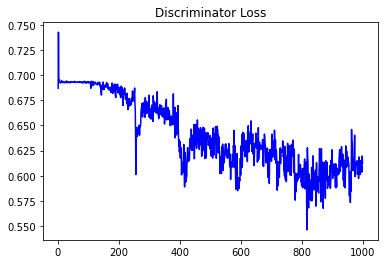

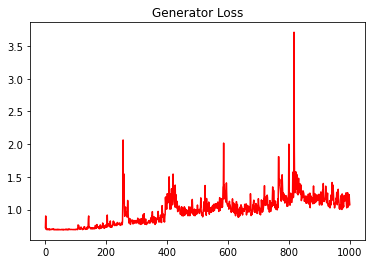

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.24177764788269995


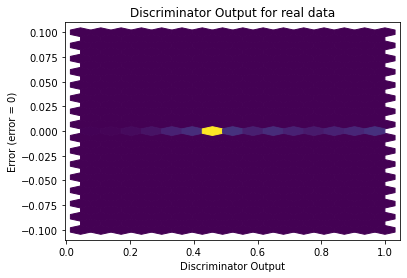

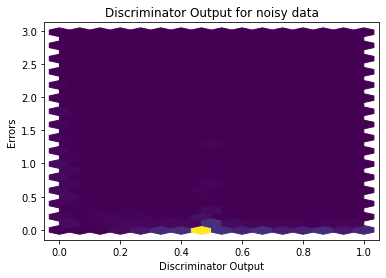

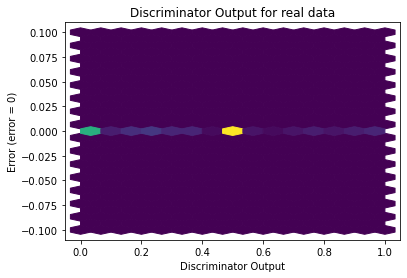

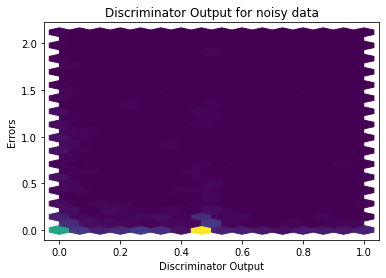

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

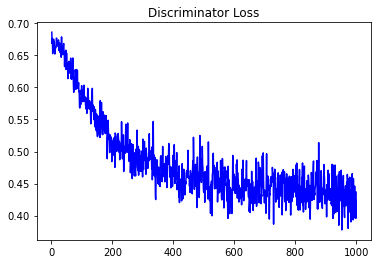

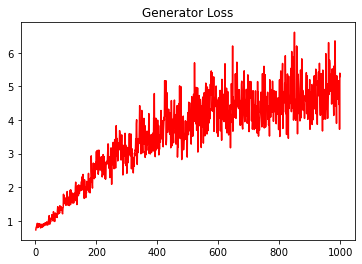

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2544352276740121


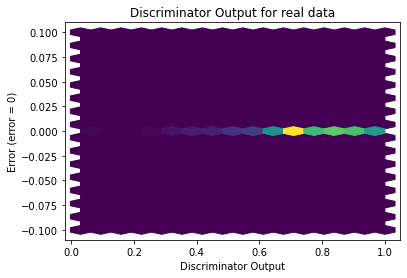

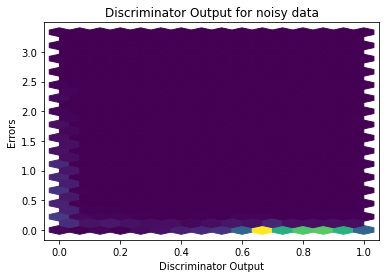

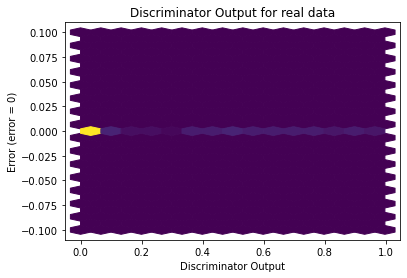

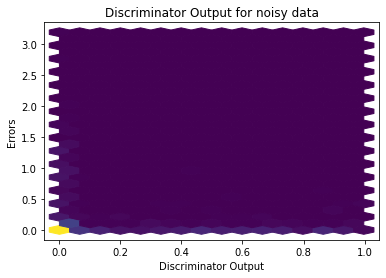

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


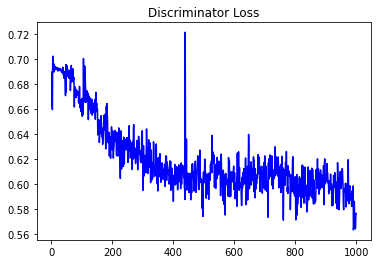

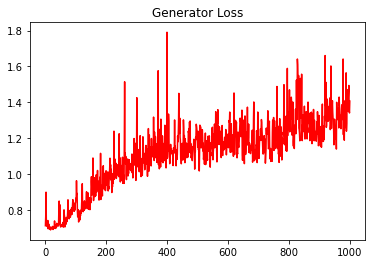

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.2767706709485684


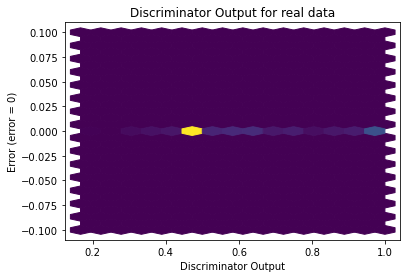

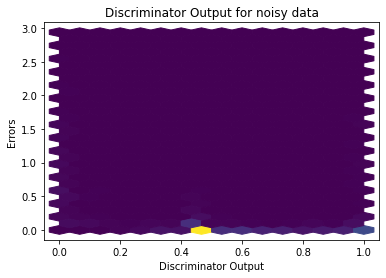

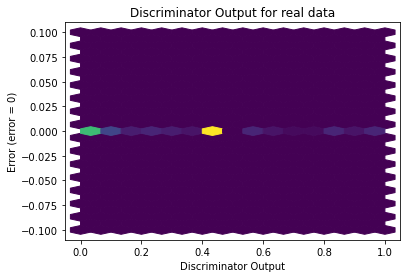

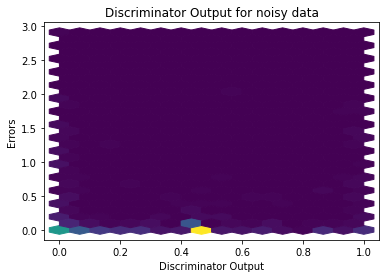

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


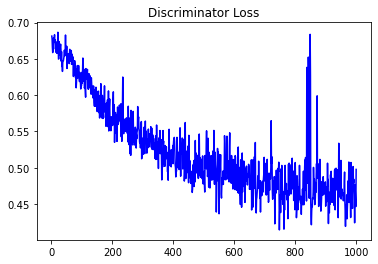

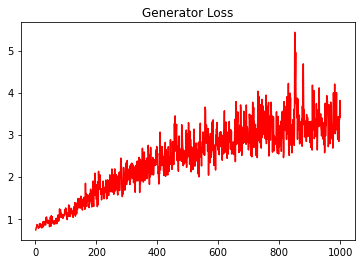

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.23365321462907185


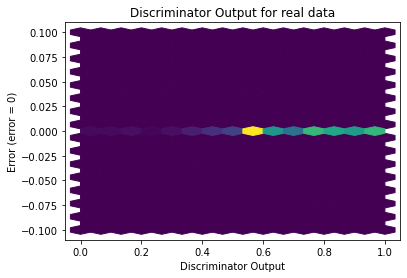

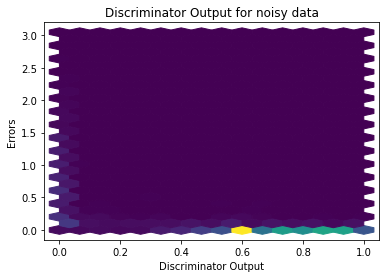

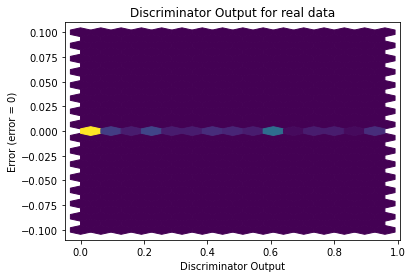

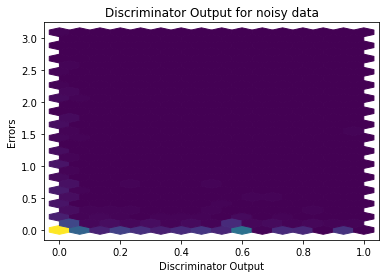

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9747]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9272]], requires_grad=True)
